In [2]:
# Ce code est le travail de l'étudiant Mohamed Ali HOUAS

# Importation des modules nécessaires
import networkx as nx
import numpy as np
import scipy as sp
from numpy import linalg as LA
import pandas as pd
import csv
import matplotlib.pylab as plt
from os import listdir

# Lire le graphe Caltech
graphCaltech=nx.read_gml("/home/debian/Téléchargements/fb100/data/Caltech36.gml")

# Lire le graphe MIT
graphMIT=nx.read_gml("/home/debian/Téléchargements/fb100/data/MIT8.gml")

# Lire le graphe Johns Hopkins
graphJH=nx.read_gml("/home/debian/Téléchargements/fb100/data/Johns Hopkins55.gml")

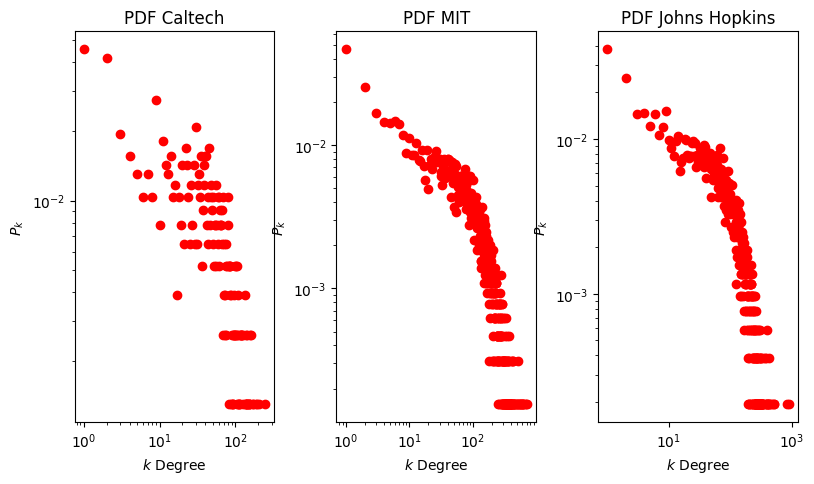

In [4]:
# Question 2/ (a)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16/2,9/2))
fig.tight_layout() # Espacer les 3 figures

def degree_distribution(graph,index,title) : # Fonction pour calculer et afficher la distribution des degrés d'un graphe
    degree = [v for k,v in dict(graph.degree()).items()]
    distribution = [(elem, degree.count(elem)) for elem in sorted(set(degree))]
    k,pk = zip(*distribution)
    PDF = np.array(pk)/sum(pk)
    if index==1 :
        axe=ax1
        axe.set_title(title)
    elif index==2 :
        axe=ax2
        axe.set_title(title)
    elif index==3 :
        axe=ax3
        axe.set_title(title)
    axe.loglog(k, PDF, 'ro')
    axe.set_xlabel("$k$ Degree")
    axe.set_ylabel("$P_k$")

degree_distribution(graphCaltech,1,"PDF Caltech")
degree_distribution(graphMIT,2,"PDF MIT")
degree_distribution(graphJH,3,"PDF Johns Hopkins")

In [6]:
# Question 2/ (b)

# Fonction pour calculer et afficher le coefficient de clustering gloval (transitivité), le coefficient de clustering local moyen
# et la densité relatifs à un graphe
def clustering_density_compute (graph) : 
    print("global clustering coefficient = ",nx.transitivity(graph))
    print("mean local clustering coefficient = ",nx.average_clustering(graph,count_zeros=True))
    nb_nodes=graph.number_of_nodes()
    nb_edges=graph.number_of_edges()
    graph_density=nb_edges/(nb_nodes*(nb_nodes-1))
    print("graph density = ",nx.density(graph))

print ("         Caltech : ")
clustering_density_compute(graphCaltech)
print ("         MIT : ")
clustering_density_compute(graphMIT)
print ("         Johns Hopkins : ")
clustering_density_compute(graphJH)

         Caltech : 
global clustering coefficient =  0.2912826901150874
mean local clustering coefficient =  0.40929439048517247
graph density =  0.05640442132639792
         MIT : 
global clustering coefficient =  0.18028845093502427
mean local clustering coefficient =  0.2712187419501315
graph density =  0.012118119495041378
         Johns Hopkins : 
global clustering coefficient =  0.19316123901594015
mean local clustering coefficient =  0.26839307371293525
graph density =  0.013910200162372396


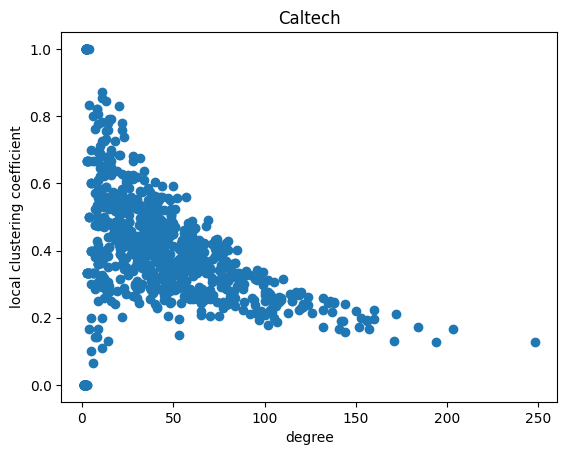

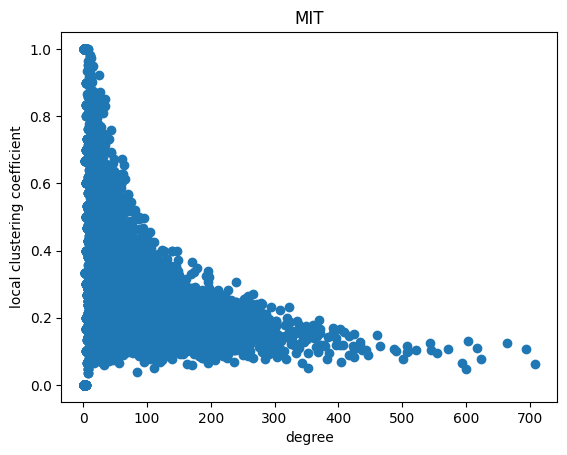

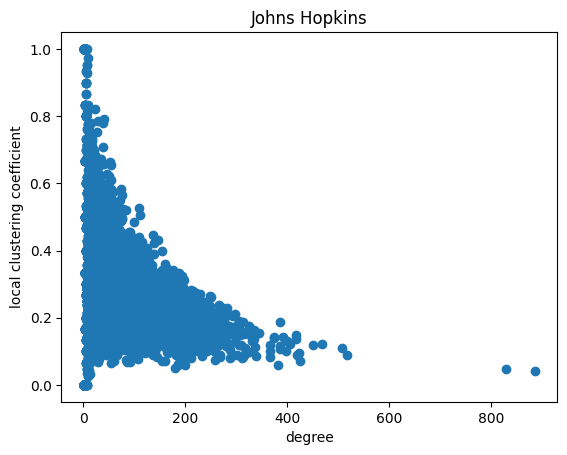

In [8]:
# Question 2/ (c)

# Fonction pour tracer un nuage de points coefficient_de_clustering_local en fonction du degree des noeuds
def scatter_degree_clustering(graph,index,title) :
    degree = [v for k,v in dict(graph.degree()).items()]
    local_clustering =[v for k,v in nx.clustering(graph).items()]
    plt.scatter(degree,local_clustering)
    if index==1 :
        plt.title(title)
    elif index==2 :
        plt.title(title)
    elif index==3 :
        plt.title(title)
    plt.xlabel("degree")
    plt.ylabel("local clustering coefficient")
    plt.show()

scatter_degree_clustering(graphCaltech,1,"Caltech")
scatter_degree_clustering(graphMIT,2,"MIT")
scatter_degree_clustering(graphJH,3,"Johns Hopkins")

In [ ]:
# Question 3/ (a)

#nx.attribute_assortativity_coefficient(graphCaltech,"student_fac")
#nx.attribute_assortativity_coefficient(graphCaltech,"major_index")

#nx.attribute_assortativity_coefficient(graphCaltech,"dorm")
#nx.attribute_assortativity_coefficient(graphCaltech,"gender")
#graphCaltech.nodes.data()
network_size=[]
assortativity=[]
gml_files_directory="/home/debian/Téléchargements/fb100/data/"
for file in listdir(gml_files_directory) :
    graph_to_read=gml_files_directory+file
    graph=nx.read_gml(graph_to_read)
    network_size.append(graph.number_of_nodes())
    assortativity.append(nx.attribute_assortativity_coefficient(graph,"gender"))

plt.scatter(network_size,assortativity)
plt.xlabel("network size")
plt.ylabel("assortativity")
plt.show()

    


In [ ]:
# Question 4/ (b)
from abc import ABC
from abc import abstractmethod
import networkx as nx
import numpy as np
import progressbar

class LinkPrediction ( ABC ) :
    def __init__ ( self , graph ) :
        """
        Constructor

        Parameters
        ----------
            graph : Networkx graph
        """
        self.graph = graph
        self.N = len ( graph )

    def neighbors ( self , v ) :
        """
        Return the neighbors list of a node

        Parameters
        ----------
            v : int
                node id

        Return
        ------
            neighbors_list : python list
        """
        neighbors_list = self.graph.neighbors ( v )
        return list ( neighbors_list )

    @abstractmethod
    def fit ( self ) :
        raise NotImplementedError ( " Fit must be implemented " )

class CommonNeighbors ( LinkPrediction ) :
    def __init__ ( self , graph ) :
        super ( CommonNeighbors , self ).__init__( graph )

In [ ]:
# Question 4/ (c)
